In [16]:
## Bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import load_model
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf

import joblib
import os
import random

In [18]:
## Carregando Informações da PETR3

acao = 'PETR3'

modelo_base = load_model('Modelo_VALE3.keras')
modelo_base.compile(optimizer='adam', loss='mse')

X_train = np.load(f'X_train_{acao}.npy')
y_train = np.load(f'y_train_{acao}.npy')
X_test = np.load(f'X_test_{acao}.npy')
y_test = np.load(f'y_test_{acao}.npy')
y_real = np.load(f'y_real_{acao}.npy')
scaler = joblib.load(f'scaler_{acao}.pkl')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
## Aplicação do Transfer Learning + Treinamento

modelo_transferido = modelo_base

modelo_transferido.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - loss: 2.1539e-04 - val_loss: 3.4485e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.0538e-05 - val_loss: 4.2881e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.7127e-05 - val_loss: 3.1437e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3655e-05 - val_loss: 2.6059e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.2325e-05 - val_loss: 2.4054e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.2096e-05 - val_loss: 2.3898e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.2339e-05 - val_loss: 2.4012e-04
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.2754e-05 - val_loss: 2.4087e-04
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3137e-05 - val_loss: 2.4111e-04
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3382e-05 - val_loss: 2.4106e-04
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3484e-

In [20]:
## Predição e Desnormalização

y_pred = modelo_transferido.predict(X_test)

y_pred_real = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((len(y_pred), scaler.n_features_in_ - 1))], axis=1))[:, 0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [21]:
## Métricas

print("MAE:", mean_absolute_error(y_real, y_pred_real))
print("MAPE:", mean_absolute_percentage_error(y_real, y_pred_real))
print("R²:", r2_score(y_real, y_pred_real))

MAE: 0.4286103965066943
MAPE: 0.012891875221519867
R²: 0.9724627631908653


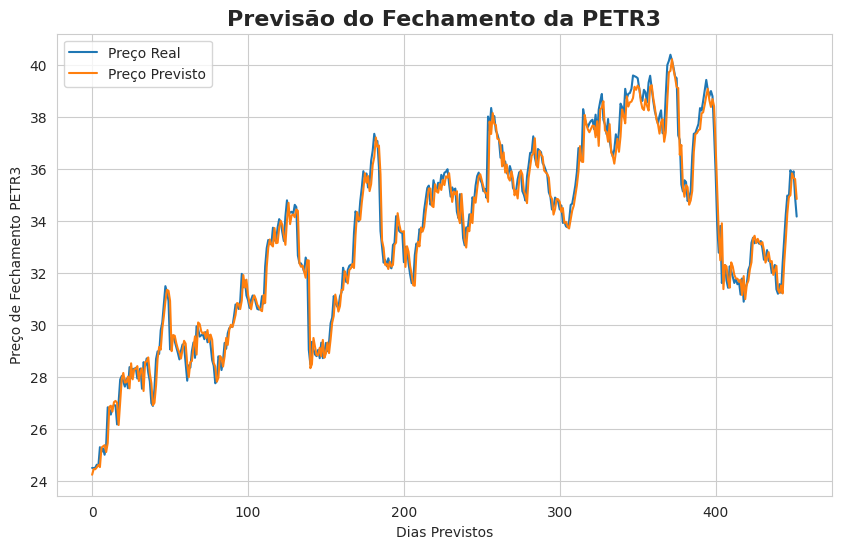

In [22]:
## Gráfico

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(y_real, label='Preço Real')
plt.plot(y_pred_real, label='Preço Previsto')
plt.xlabel('Dias Previstos')
plt.ylabel(f'Preço de Fechamento {acao}')
plt.title(f'Previsão do Fechamento da {acao}', fontweight='bold', fontsize=16)
plt.legend()
plt.show()

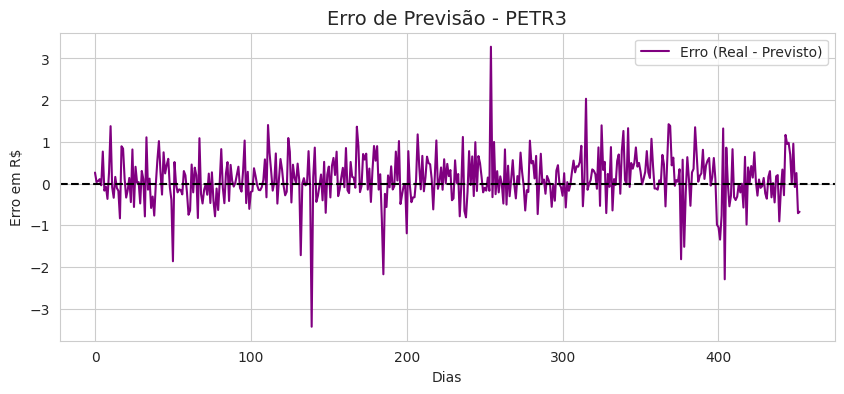

In [23]:
## Gráfico

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

erro = y_real.flatten() - y_pred_real.flatten()  # Garante que são vetores 1D

plt.plot(erro, label='Erro (Real - Previsto)', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title(f'Erro de Previsão - {acao}', fontsize=14)
plt.xlabel('Dias')
plt.ylabel('Erro em R$')
plt.legend()
plt.show()

In [24]:
## Salvar o modelo

modelo_transferido.save('Modelo_PETR3.keras', save_format='keras')
modelo_transferido.save('Modelo_PETR3.h5')